In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing data
df = pd.read_csv('spam.csv',encoding = 'latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1611,ham,645,NaN,NaN,NaN
3677,spam,Promotion Number: 8714714 - UR awarded a City ...,NaN,NaN,NaN
2570,ham,From 5 to 2 only my work timing.,NaN,NaN,NaN
706,ham,So when do you wanna gym harri,NaN,NaN,NaN
25,ham,Just forced myself to eat a slice. I'm really ...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
3539,ham,"I'll get there at 3, unless you guys want me t..."
1660,ham,No just send to you. Bec you in temple na.
2346,ham,Its posible dnt live in &lt;#&gt; century cm ...
67,spam,Urgent UR awarded a complimentary trip to Euro...
3483,ham,Tell my bad character which u Dnt lik in me. ...


In [6]:
# Renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4286,ham,I wud never mind if u dont miss me or if u don...
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g..."
738,ham,Wish i were with you now!
5083,ham,Aiya we discuss later lar... Pick Ì_ up at 4 i...
4303,ham,"Good good, billy mates all gone. Just been jog..."


In [7]:
# Label encoding the target values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['target'] = le.fit_transform(df['target'])
df.sample(5)

,target,text
4512,1,Money i have won wining number 946 wot do i do...
1158,0,Hey! There's veggie pizza... :/
6,0,Even my brother is not like to speak with me. ...
1225,0,"sir, you will receive the account no another 1..."
5299,0,Well good morning mr . Hows london treatin' ya...


In [8]:
# Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# Check for duplicate values
df.duplicated().sum()

403

In [10]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

## EDA

In [13]:
# Target values 
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

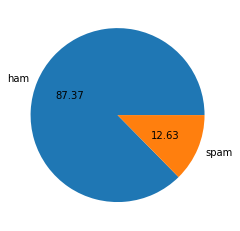

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
# Data is imbalanced

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [18]:
# Total characters in text
df['num_characters'] = df['text'].apply(len)

In [19]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# Number of words 
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# Number of sentences
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
# Ham msgs statisticasl summary
df[df['target']== 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
# spam msgs statisticasl summary
df[df['target']== 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [25]:
import seaborn as sns

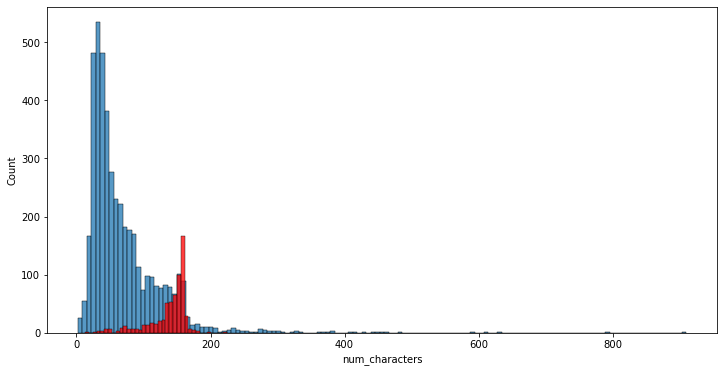

In [26]:
# Number of characters distribution
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters']) #Ham
sns.histplot(df[df['target']==1]['num_characters'],color='red') #spam
plt.show()

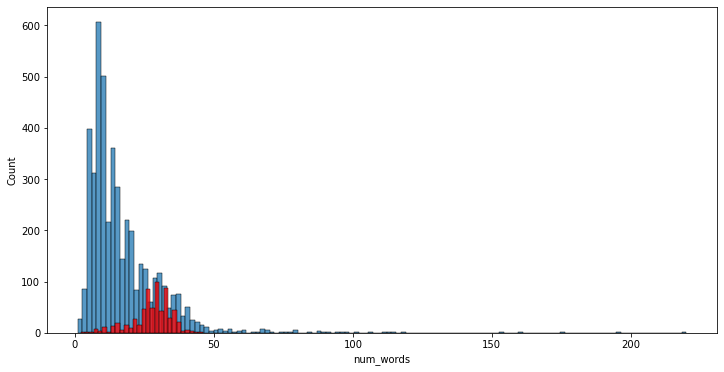

In [27]:
# Number of words distribution
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) #Ham
sns.histplot(df[df['target']==1]['num_words'],color='red') #spam
plt.show()

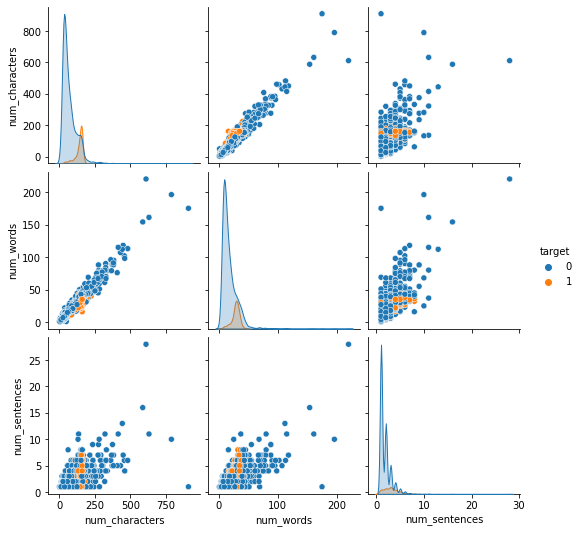

In [28]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

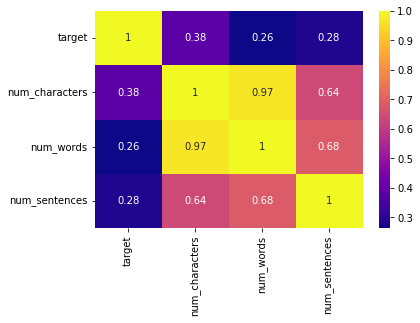

In [29]:
# Correlation
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [30]:
# Multicollinearity is there and the best feature to keep is num_characters

## Data Preprocessing

In [31]:
# stopwords
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [32]:
# punctuations
import string
punc = string.punctuation

In [33]:
# stemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(text):
    
    #lowercase
    text = text.lower()
    
    #Word Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y.copy()
    y.clear()
        
    # Removing stopwords
    for i in text:
        if i not in sw and i not in punc:
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    #Stemming
    for i in text:
        y.append(ps.stem(i))
        
    #output
    return " ".join(y)     

In [35]:
print(df['text'][10])

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.


In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
# Making transformed text column
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from collections import Counter

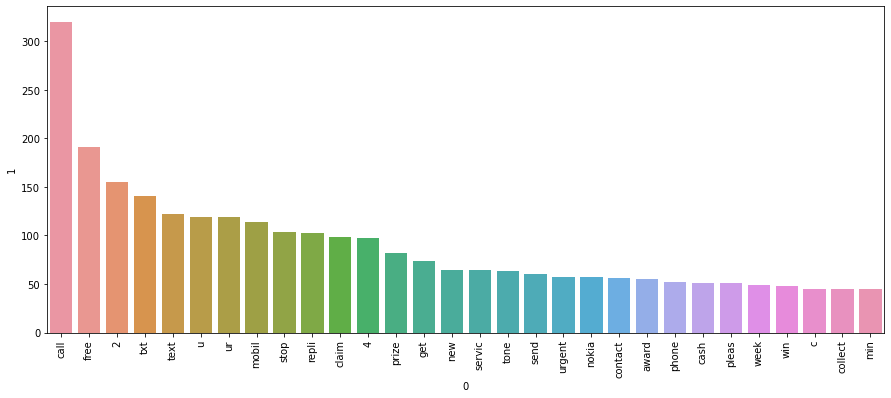

In [40]:
# Top 30 words in spam corpus
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
plt.figure(figsize=(15,6))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()       

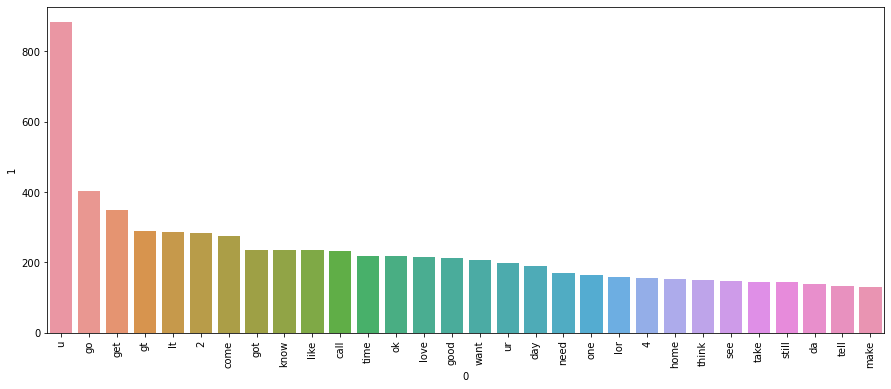

In [41]:
# Top 30 words in ham corpus
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
plt.figure(figsize=(15,6))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()     

## Model Building

### Using Bag of words

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [43]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [44]:
X.shape

(5169, 6708)

In [45]:
y = df['target'].values

In [46]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [49]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [50]:
# Gaussian
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print()
print(confusion_matrix(y_test,y_pred1))
print()
print(precision_score(y_test,y_pred1))

0.8800773694390716

[[792 104]
 [ 20 118]]

0.5315315315315315


In [51]:
# Multinomial
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print()
print(confusion_matrix(y_test,y_pred2))
print()
print(precision_score(y_test,y_pred2))

0.9642166344294004

[[871  25]
 [ 12 126]]

0.8344370860927153


In [52]:
# Bernoulli
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print()
print(confusion_matrix(y_test,y_pred3))
print()
print(precision_score(y_test,y_pred3))

0.9700193423597679

[[893   3]
 [ 28 110]]

0.9734513274336283


### Using tfidf

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
X.shape

(5169, 6708)

In [56]:
y = df['target'].values

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
# Gaussian
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print()
print(confusion_matrix(y_test,y_pred1))
print()
print(precision_score(y_test,y_pred1))

0.8762088974854932

[[793 103]
 [ 25 113]]

0.5231481481481481


In [61]:
# Multinomial
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print()
print(confusion_matrix(y_test,y_pred2))
print()
print(precision_score(y_test,y_pred2))

0.9593810444874274

[[896   0]
 [ 42  96]]

1.0


In [62]:
# Bernoulli
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print()
print(confusion_matrix(y_test,y_pred3))
print()
print(precision_score(y_test,y_pred3))

0.9700193423597679

[[893   3]
 [ 28 110]]

0.9734513274336283


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [67]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454


KeyboardInterrupt: 

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

## Model Improvement

In [ ]:
# Change the max_features parameter of tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

In [68]:
# Final model
f_model = MultinomialNB()
f_model.fit(X_train,y_train)
y_pred_mnb = f_model.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print()
print(confusion_matrix(y_test,y_pred_mnb))
print()
print(precision_score(y_test,y_pred_mnb))

0.9593810444874274

[[896   0]
 [ 42  96]]

1.0


In [71]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(f_model,open('model.pkl','wb'))